# Linear Regression 

In this example, we will learn how to train a very basic linear regression model with **scikit-learn**. <br/>
Furthermore, we will also practice analyzing data with Pandas.

#### Dataset: California Housing

As an example dataset we will use the California Housing dataset. The data contains information from the 1990 California census.  A description of this dataset can be found here: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Fortunately, the dataset is already provided in scikit-learn. So, there is no need to fetch the data from Kaggle manually. See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
# Import modules which are relevant for this project
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

## Load the dataset

In [3]:
# as_frame: 
# If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric, string or categorical). 
# The target is a pandas DataFrame or Series depending on the number of target_columns.
dataset = fetch_california_housing(as_frame=True)

In [4]:
# Check what keys are available.
# We are interested in <data> and <target>
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
housing_df = dataset['data']
target_df = dataset['target']

In [9]:
housing_df['HousePrice'] = target_df

## Analyze the data

Since we have now successfully loaded the data, our first step will be to get an understanding of our data. 

In [6]:
# TODO: Analyze the datasets
# - How many instances does the dataset have?
# - What columns does it have and what do they represent?
# - What are the datatypes?
# - What is our target variable and what are the features?

Let's take a closer look at the values in `housing_df`.

Looking at the mean and median values, we can already gain some information about the distribution of the data and whether they are skewed.

Recall that if a distribution is **left-skewed**, it has a tail on the left which means that the Mean < Median < Mode. <br/>
If it's **right-skewed**, it has a tail on the right which means that Mode < Median < Mean.

In [7]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HousePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


However, we typically get a better understanding if we visualize the data. Let's take a look at the histograms.

<Axes: >

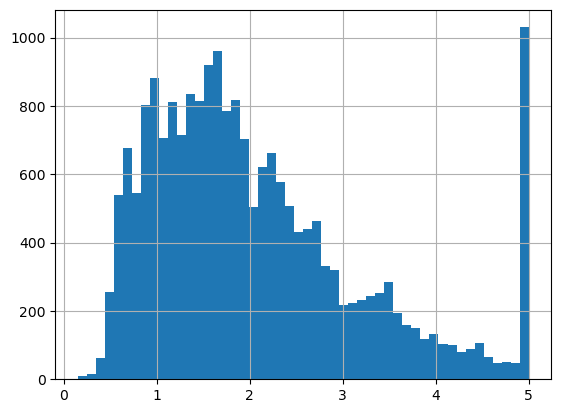

In [15]:
housing_df['HousePrice'].hist(bins=50)

<Axes: xlabel='MedInc', ylabel='HousePrice'>

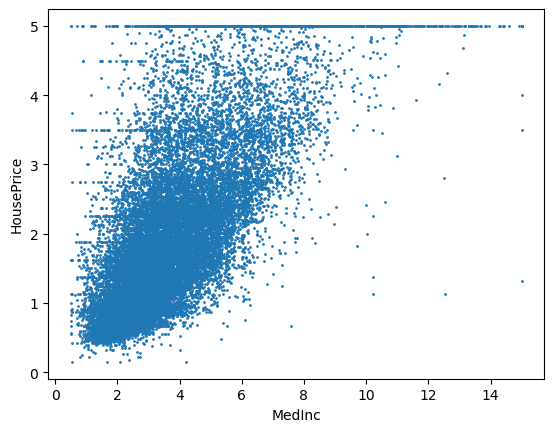

In [17]:
housing_df.plot(kind='scatter', x='MedInc', y='HousePrice', s=1)

However, doing this for every feature individually is a little bit inconvenient. Luckily, there is a faster way to do this for all features.

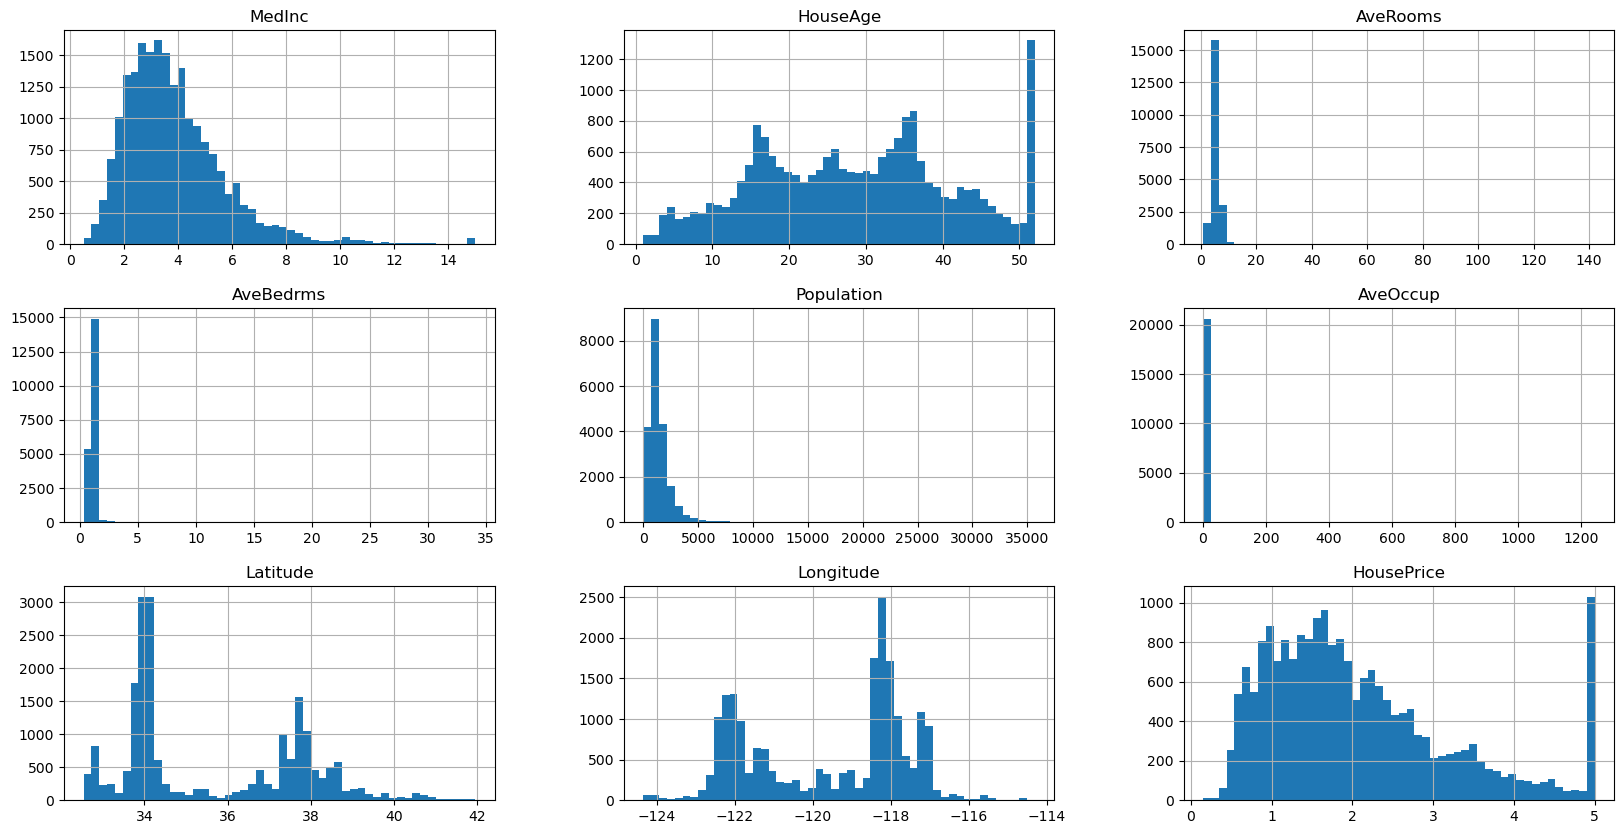

In [19]:
hist = housing_df.hist(bins=50, figsize=(20, 10))

Since our goal is to train a linear regression model, it's important to understand which colums well correlated with the house price. <br/>
A fast way to obtain this informations is by computing the pairwise correlations between the columns.

The **Person Correlation coefficient** is a way to measure how correlated to variables are. A value close to 1 indicates that two variables exhibit perform positive correlation. A values close to -1 indicates perfect negative correlation. See: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [4]:
# TODO: Compute the pairwise correlation between the different variables

Alternatively, we can use [Seaborn](https://seaborn.pydata.org/index.html) to graphically visualize the correlation matrix. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
# TODO:Use seaborn to create a heatmap of the correlation matrix

We are primarily interested in the correlation of each variable with `HousePrice`. So let's do some filtering. <br/>
What we would like to see are values close to 1 or -1.

In [14]:
# TODO: Obtain the correlation coefficient of all variables with HousingPrice
# Which variable can be expect to 

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HousePrice, dtype: float64

In [6]:
# TODO: Visually inspect the correlation between the chosen variable and HousePrice
# What is a good plot type?
# What insight can we gain from this plot

## Preview: Train our first linear regression model

To get familiar with linear regression models, we will now train our first linear regressor on two variables only (`MedInc` and `HousePrice`). In this notebook, we will not split the dataset into two subsets (train and test). This will be done in the next notebook. For now, we only care how a linear regression can be created and trained with scikit-learn.

I recommend taking a look at the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

This page provides some nice examples that show how to fit a line to some points: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [23]:
model = LinearRegression()

x_train = housing_df['MedInc'].values.reshape(-1, 1)
y_train = housing_df['HousePrice'].values.reshape(-1, 1)



In [24]:
model.fit(x_train, y_train)

LinearRegression()

That's it, we just trained your first model. Let's take a look at its predictions.

In [26]:
# Sample points at regular intervals
x_line = np.arange(0, 10, 0.01).reshape(-1, 1)

In [28]:
y_line = model.predict(x_line)

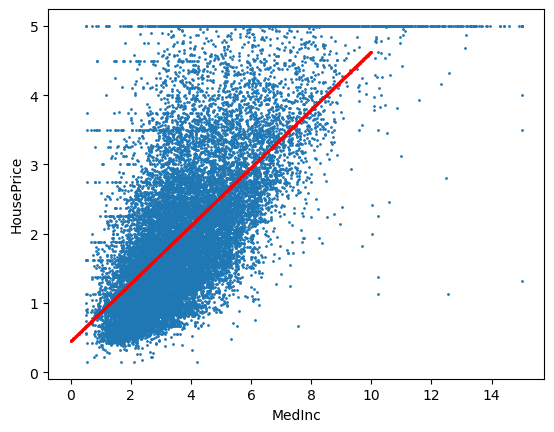

In [31]:
ax = housing_df.plot(kind='scatter', x='MedInc', y='HousePrice', s=1)
ax.scatter(x_line, y_line, c='r', s=1)

In [ ]:
# Question: 
# How can we measure the performance of our model?
# Is our model good or bad?